# Chi Square Distribution

The Chi-Square distribution ($χ^2$) is a continuous probability distribution that arises in statistics when analyzing the sum of squared standard normal variables. It is parameterized by degrees of freedom (k), which determines the shape of the distribution. Key properties include:

- Support : $x≥0$
- Mean : $k$
- Variance : $2k$

Applications : Hypothesis testing (goodness-of-fit, independence tests), confidence intervals for variance, and econometric model diagnostics.

In [6]:
from IPython.display import Markdown, display
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Define the mathematical formulation of the Chi-Square distribution
chi_square_formula = r'''
<div align="center">
$$
f(x; k) = \frac{1}{2^{k/2} \Gamma\left(\frac{k}{2}\right)} x^{\frac{k}{2}-1} e^{-\frac{x}{2}}
$$
</div>
'''
# Display the formula
display(Markdown(chi_square_formula))


<div align="center">
$$
f(x; k) = \frac{1}{2^{k/2} \Gamma\left(\frac{k}{2}\right)} x^{\frac{k}{2}-1} e^{-\frac{x}{2}}
$$
</div>


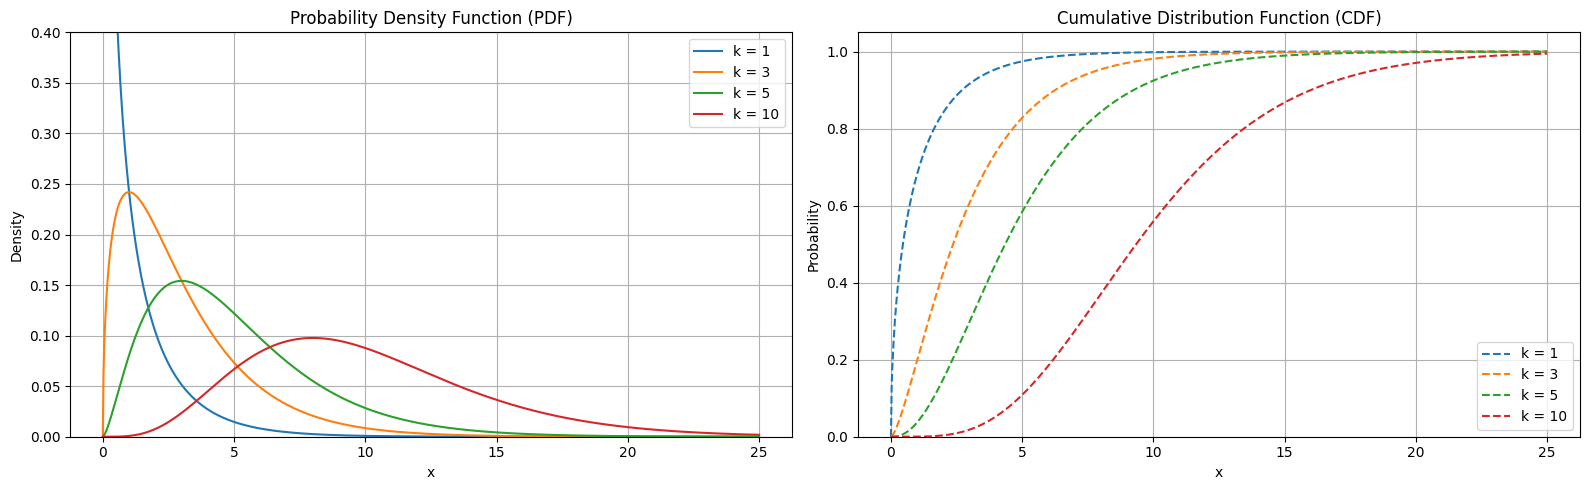

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define degrees of freedom
k_values = [1, 3, 5, 10]

# Create x-axis values (non-negative for Chi-Square)
x = np.linspace(0, 25, 1000)

# Create subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# Plot PDFs
for k in k_values:
    pdf = stats.chi2.pdf(x, k)
    ax1.plot(x, pdf, label=f'k = {k}')
ax1.set_title('Probability Density Function (PDF)')
ax1.set_xlabel('x')
ax1.set_ylabel('Density')
ax1.legend()
ax1.grid(True)
ax1.set_ylim(0, 0.4)

# Plot CDFs
for k in k_values:
    cdf = stats.chi2.cdf(x, k)
    ax2.plot(x, cdf, label=f'k = {k}', linestyle='--')
ax2.set_title('Cumulative Distribution Function (CDF)')
ax2.set_xlabel('x')
ax2.set_ylabel('Probability')
ax2.legend()
ax2.grid(True)
ax2.set_ylim(0, 1.05)

plt.tight_layout()
plt.show()

### Example 1: Goodness-of-Fit Test for Market Share

The Chi-Square Goodness-of-Fit test assesses whether observed categorical data significantly deviates from an expected distribution. Here, we evaluate if regional sales distributions are fair (uniform) or skewed. If skewed, it suggests external factors like marketing efforts or socioeconomic differences affect sales.

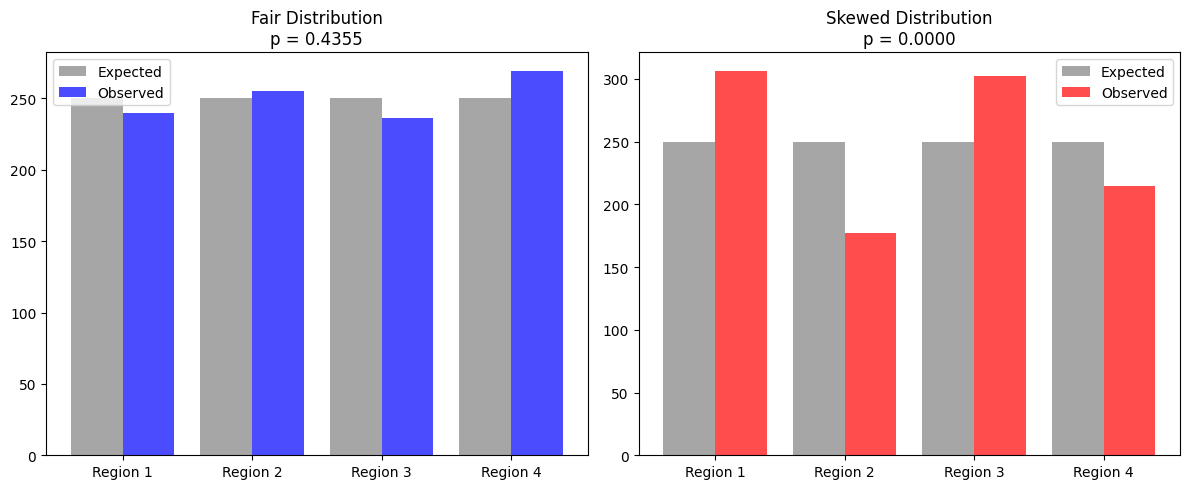

Fair Data: Chi-Square = 2.73, p-value = 0.4355 (Fail to reject H0: shares are equal)
Skewed Data: Chi-Square = 49.58, p-value = 0.0000 (Reject H0: shares differ)


In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Expected sales per region (assuming equal distribution)
expected = np.array([250, 250, 250, 250])

# Observed sales: one fair distribution, one skewed
observed_fair = np.random.multinomial(1000, [0.25, 0.25, 0.25, 0.25])
observed_skewed = np.random.multinomial(1000, [0.3, 0.2, 0.3, 0.2])

# Chi-Square Test
chi2_fair, p_fair = stats.chisquare(observed_fair, expected)
chi2_skewed, p_skewed = stats.chisquare(observed_skewed, expected)

# Plot observed vs. expected data
labels = ["Region 1", "Region 2", "Region 3", "Region 4"]
x = np.arange(len(labels))

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Fair data plot
ax[0].bar(x - 0.2, expected, width=0.4, label="Expected", color="gray", alpha=0.7)
ax[0].bar(x + 0.2, observed_fair, width=0.4, label="Observed", color="blue", alpha=0.7)
ax[0].set_title(f"Fair Distribution\np = {p_fair:.4f}")
ax[0].set_xticks(x)
ax[0].set_xticklabels(labels)
ax[0].legend()

# Skewed data plot
ax[1].bar(x - 0.2, expected, width=0.4, label="Expected", color="gray", alpha=0.7)
ax[1].bar(x + 0.2, observed_skewed, width=0.4, label="Observed", color="red", alpha=0.7)
ax[1].set_title(f"Skewed Distribution\np = {p_skewed:.4f}")
ax[1].set_xticks(x)
ax[1].set_xticklabels(labels)
ax[1].legend()

plt.tight_layout()
plt.show()

# Interpretation
print(f"Fair Data: Chi-Square = {chi2_fair:.2f}, p-value = {p_fair:.4f} (Fail to reject H0: shares are equal)")
print(f"Skewed Data: Chi-Square = {chi2_skewed:.2f}, p-value = {p_skewed:.4f} (Reject H0: shares differ)")


Interpretation:
- Fair Data: The p-value is high (typically >0.05), meaning no significant deviation from the expected uniform distribution. This suggests sales across regions are balanced.
- Skewed Data: The p-value is low (typically <0.05), indicating a significant deviation from the expected distribution. This suggests external factors (e.g., regional economic conditions, marketing intensity, or access disparities) may influence sales.

Policy Implications:
- If sales are skewed, policymakers or businesses should investigate disparities.
- Targeted marketing or subsidy programs could ensure equitable product/service access across regions.
- If disparities reflect socioeconomic inequalities, policies promoting fair distribution (e.g., subsidies in underserved areas) may be necessary.
- Continuous monitoring using statistical tests can help policymakers track the effectiveness of interventions.

### Example 2. Test of Independence (Education vs. Employment)

The Chi-Square Test of Independence checks if two categorical variables—education level (High School, Bachelor’s, Master’s) and employment status (Employed, Unemployed)—are statistically independent.

- Null Hypothesis ($H_0$): Education level and employment status are independent (no relationship).
- Alternative Hypothesis ($H_1$): Education level and employment status are dependent (education affects employment).
- If dependence is found, it suggests that higher education may significantly impact employment chances.

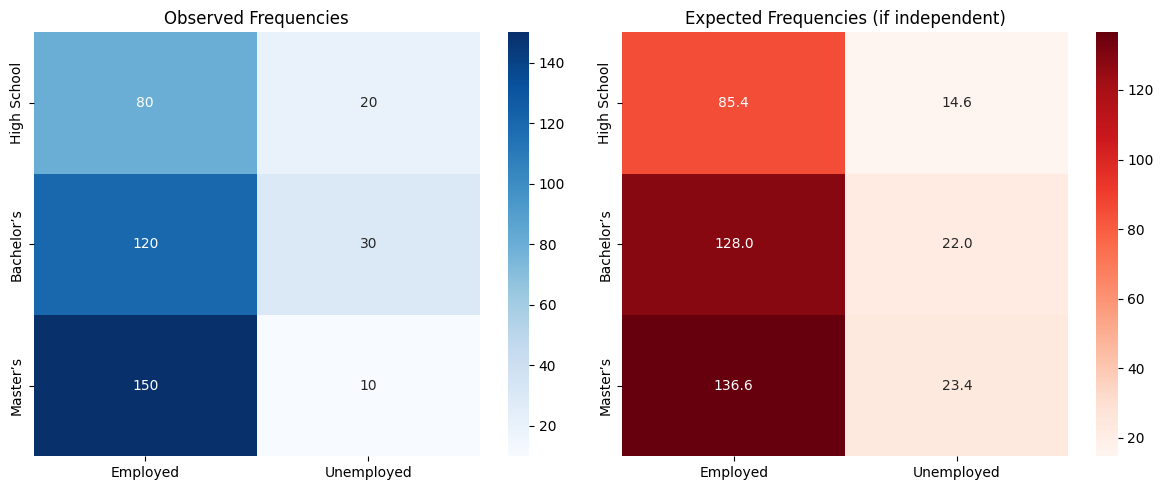

Chi-Square Statistic = 14.76
p-value = 0.0006
Degrees of Freedom = 2
Reject H₀: Education level and employment status are dependent.


In [3]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Set seed for reproducibility"
np.random.seed(42)

# Simulated contingency table
# Rows: Education Levels | Columns: Employment Status (Employed, Unemployed)
data = np.array([
    [80, 20],  # High School
    [120, 30], # Bachelor’s
    [150, 10]  # Master’s
])

# Perform Chi-Square Test of Independence
chi2, p, dof, expected = stats.chi2_contingency(data)

# Heatmap for observed vs expected frequencies
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Labels
education_levels = ["High School", "Bachelor’s", "Master’s"]
employment_status = ["Employed", "Unemployed"]

# Heatmap of observed values
sns.heatmap(data, annot=True, fmt="d", cmap="Blues", xticklabels=employment_status, yticklabels=education_levels, ax=ax[0])
ax[0].set_title("Observed Frequencies")

# Heatmap of expected values under independence assumption
sns.heatmap(expected, annot=True, fmt=".1f", cmap="Reds", xticklabels=employment_status, yticklabels=education_levels, ax=ax[1])
ax[1].set_title("Expected Frequencies (if independent)")

plt.tight_layout()
plt.show()

# Interpretation
print(f"Chi-Square Statistic = {chi2:.2f}")
print(f"p-value = {p:.4f}")
print(f"Degrees of Freedom = {dof}")

if p < 0.05:
    print("Reject H₀: Education level and employment status are dependent.")
else:
    print("Fail to reject H₀: No significant relationship between education and employment.")


Interpretation:

- If $p-value$ < $0.05$, reject $H_0$ → Education and employment are dependent. This means a higher education level improves employment chances.
- If $p-value$ > $0.05$, fail to reject $H_0$ → No strong evidence that education affects employment status.

Policy Implications:
- If education significantly impacts employment, policymakers should invest in higher education and vocational training to improve employment rates.
- If no significant relationship exists, the issue might lie in labor market inefficiencies, requiring interventions like job placement programs, employer incentives, or skill-based training.

### Example 3: Testing Variance of Economic Growth Rates

The Chi-Square Variance Test examines whether the variance of a country's GDP growth rate matches a theoretical value (e.g., $σ^2=1.5$).

- Null Hypothesis ($H_0$): The GDP growth rate variance equals the theoretical value.
- Alternative Hypothesis ($H_1$): The GDP growth rate variance is different from the theoretical value.
- If the variance is significantly different, it suggests that GDP growth is more (or less) volatile than expected, influencing economic planning and risk assessment. .

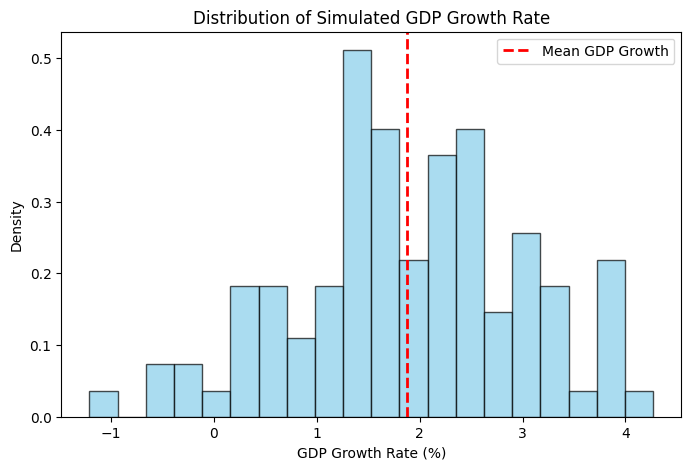

Chi-Square Test Statistic = 81.65
Sample Variance = 1.24, Theoretical Variance = 1.5
p-value = 0.2058
Fail to reject H₀: GDP growth rate variance matches the theoretical value.


In [4]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Simulated GDP growth rate data (normal distribution with variance = 1.5)
true_variance = 1.5
sample = np.random.normal(loc=2, scale=np.sqrt(true_variance), size=100)  
sample_var = np.var(sample, ddof=1)  # Sample variance
k = len(sample) - 1  # Degrees of freedom

# Chi-Square test statistic
chi2_stat = (k * sample_var) / true_variance

# p-value (two-tailed test)
p_value = 2 * min(stats.chi2.cdf(chi2_stat, df=k), 1 - stats.chi2.cdf(chi2_stat, df=k))

# Histogram to visualize variance distribution
plt.figure(figsize=(8, 5))
plt.hist(sample, bins=20, color="skyblue", edgecolor="black", alpha=0.7, density=True)
plt.axvline(x=np.mean(sample), color="red", linestyle="dashed", linewidth=2, label="Mean GDP Growth")
plt.title("Distribution of Simulated GDP Growth Rate")
plt.xlabel("GDP Growth Rate (%)")
plt.ylabel("Density")
plt.legend()
plt.show()

# Interpretation
print(f"Chi-Square Test Statistic = {chi2_stat:.2f}")
print(f"Sample Variance = {sample_var:.2f}, Theoretical Variance = {true_variance}")
print(f"p-value = {p_value:.4f}")

if p_value < 0.05:
    print("Reject H₀: GDP growth rate variance differs significantly from the expected value.")
else:
    print("Fail to reject H₀: GDP growth rate variance matches the theoretical value.")


Interpretation:

- If $p-value$ < $0.05$, reject $H_0$ → The variance of GDP growth is significantly different from the expected value. This suggests economic instability or policy shocks.
- If $p-value$ > $0.05$, fail to reject $H_0$ → The variance is in line with expectations, indicating stable economic growth.

Policy Implications:
- If variance is higher than expected, it signals economic instability, requiring policy interventions like monetary adjustments, fiscal stimulus, or trade policies to stabilize growth.
- If variance is lower than expected, it suggests a highly predictable economic environment, allowing for long-term planning and investment stability.

In [5]:
!jupyter nbconvert Chi_Square_Distribution.ipynb --to latex

[NbConvertApp] Converting notebook Chi_Square_Distribution.ipynb to latex
[NbConvertApp] Support files will be in Chi_Square_Distribution_files\
[NbConvertApp] Writing 49439 bytes to Chi_Square_Distribution.tex


In [7]:
!xelatex Chi_Square_Distribution.tex -quiet